# Esse é o código para resolução do desafio Seazone

Ele consiste na análise de dados imobiliários.

O Jupyter Notebook foi a ferramenta escolhida pela clareza do código e facilidade na visualização dos dados.

<h3> Começamos importando os módulos necessários em Python </h3>

In [1]:
# Descomente e execute os comandos abaixo se o codigo não funcionar

# !pip install pandas
# !pip install numpy
# !pip install datetime
# !pip install matplotlib

In [2]:
import pandas as pd # Representação dos dados
import numpy as np # Calculos numericos e estatisticos
import datetime # Facilitar os calculos envolvendo datas
import matplotlib.pyplot as plt # Metodos para visualização dos dados

O primeiro passo é abrir os arquivos .csv e representá-los na forma de um dataframe em Pandas

In [3]:
diretorio_dados1 = "./Data/desafio_details (1).csv"
diretorio_dados2 = "./Data/desafio_priceav (1).csv"

data_details = pd.read_csv(diretorio_dados1)
data_listings = pd.read_csv(diretorio_dados2)

Agora a visualização inicial dos dataframes

In [4]:
print("Dataset detais")
data_details.head()

Dataset detais


,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


In [5]:
print("Dataset Price")
data_listings.head()

Dataset Price


,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0


Análise no número de features e tamanho.

In [6]:
print(data_details.shape)
print(data_listings.shape)

(4691, 9)
(354520, 7)


O csv parece ter sido extraído de um database relacional SQL, ou se beneficiaria muito de ser organizado nesse tipo de database.

Contudo, como a transformação em SQL pode ser custosa em tempo de computação, os dados serão analisados em pandas. O Pandas possui também operações de vetorização que garantem uma boa eficiência.

Seria recomendado adicionar os dados a esse tipo de database se diversas consultas relacionais forem necessárias, já que as consultas poderiam ser otimizadas com indexações e hashes.

Finalmente, é interessante criar um novo dataset para os cálculos relativos ao faturamento, para isso retiramos os valores os anúncios marcados como ocupados

In [7]:
data_price = data_listings[data_listings["occupied"] == 1]
data_price = data_listings[data_listings["occupied"] == 1]

data_price.head(10)

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
12,12,6452,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1
13,13,6453,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1
52,52,6492,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1
53,53,6493,40206270,2021-02-10 00:00:00,2021-02-11,350.0,1
54,54,6494,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1
55,55,6495,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1
56,56,6496,40206270,2021-02-10 00:00:00,2021-02-13,350.0,1
57,57,6497,40206270,2021-02-10 00:00:00,2021-02-13,350.0,1
58,58,6498,40206270,2021-02-10 00:00:00,2021-02-14,350.0,1
59,59,6499,40206270,2021-02-10 00:00:00,2021-02-14,350.0,1


Agora uma análise de quantos dados são perdidos por feature. Primeiro para os dados do desafio_details.csv

In [8]:
for feature in data_details:
    print(str(feature), dict(data_details[feature].isnull().value_counts()))

Unnamed: 0 {False: 4691}
airbnb_listing_id {False: 4691}
suburb {False: 4691}
ad_name {False: 4691}
number_of_bedrooms {False: 4508, True: 183}
number_of_bathrooms {False: 4690, True: 1}
star_rating {False: 2570, True: 2121}
is_superhost {False: 4691}
number_of_reviews {False: 4684, True: 7}


Nesse caso True marca os dados faltantes. Para a maioria das features no dataset temos a maior parte dos dados presentes as ausências podem ser desconsideradas nos cálculos estatísticos. Contudo, para os ratings em termos de estrelas temos uma perda de 50% dos dados. Então é essencial tratá-los para melhorar os resultados.

Primeiramente investigamos se os rating em estrelas desapareceram devido à ausência de reviews. Então verificamos os números de dados sem nenhum rating e nenhuma review.

In [9]:
len(data_details[np.logical_and(data_details["star_rating"].isnull(),data_details["number_of_reviews"] == 0)])

1153

Com esse número podemos perceber que existem imóveis com reviews sem star ratings. Seria interessante investigar os motivos disso, mas sem informações sobre a coleta de dados a decisão de como lidar com eles será tomada no momento da análise.

Agora para os dados dos listings

In [10]:
for feature in data_listings:
    print(str(feature), dict(data_listings[feature].isnull().value_counts()))

Unnamed: 0 {False: 354520}
Unnamed: 0.1 {False: 354520}
airbnb_listing_id {False: 354520}
booked_on {False: 354520}
date {False: 354520}
price_string {False: 354520}
occupied {False: 354520}


Perfeito, nesse dataset todos os dados estão presentes. Nenhum tratamento referente a isso é necessário.

# 1 Tarefa

Ordenar os bairros.

Essa tarefa pode ser obtida diretamente do comando value_counts do modulo pandas. Esse comando vai contar o número de linhas para cada bairro diferente.

In [11]:
listings_bairro = dict(data_details["suburb"].value_counts())

Agora, ordenarmos o dicionário usando os valores obtidos.

In [12]:
listings_bairro_sorted = dict(sorted(listings_bairro.items(), key=lambda item: item[1], reverse=True))
for key in listings_bairro_sorted:
    print(key, listings_bairro_sorted[key])

Ingleses 2388
Canasvieiras 1177
Jurerê 539
Lagoa da Conceição 309
Centro 278


O gráfico de barras para melhor visualização

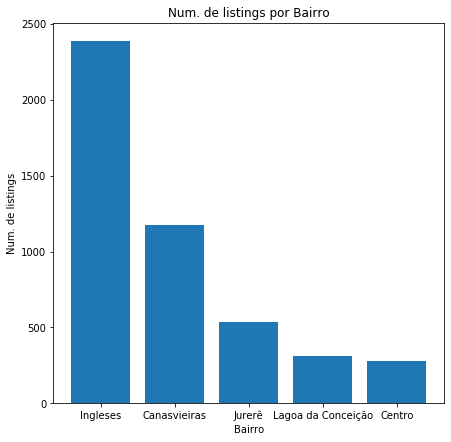

In [13]:
x = list(range(len(listings_bairro_sorted)))
plt.figure(figsize=(7,7))
plt.title("Num. de listings por Bairro")
plt.xlabel("Bairro")
plt.ylabel("Num. de listings")
plt.xticks(x, list(listings_bairro_sorted.keys()))
plt.bar(x, list(listings_bairro_sorted.values()))
plt.show()

# Tarefa 2

Para realização da tarefa 2 começaremos calculando o faturamento médio de cada imóvel por dia (cada airbnb_listing_id) e adicionando ao dataframe data_details. Consideramos também que o faturamento é zero nos dias que o imóvel não está ocupado e se seu id não se encontra na lista "desafio_priceav".

Isso foi feito para facilitar a resolução da questão 3 que envolve também dados de faturamento.

In [14]:
# Separar as variaveis de listing_ids para vetorização
listings_ids = list(data_details.loc[:, "airbnb_listing_id"])


# Calculamos o faturamento medio por listing somando apenas os valores quando o imovel estava ocupado e dividindo
# por todos os dias disponivels. Calculando assim o faturamento medio
# Para os dados onde não temos informações sobre o faturamento ou seja nenhum elemento em data_listings
# Colocamos "N/A" para indicar que não temos informações sobre o faturamento
number_of_ids_not_in_listing = 0
faturamento = []
for list_id in listings_ids:
    try:
        faturamento.append(sum(data_price[data_price["airbnb_listing_id"] == list_id]["price_string"])
                           /len(data_listings[data_listings["airbnb_listing_id"] == list_id]))
    except ZeroDivisionError:
        number_of_ids_not_in_listing = number_of_ids_not_in_listing + 1
        faturamento.append("N/A")

# Numero de ids que não se econtram na data_listings
print("Numero de ids que não se econtram na data_listings:" + str(number_of_ids_not_in_listing))

# Adicionando o faturamento ao dataframe
data_details["Faturamento"] = faturamento
data_details["Faturamento"].replace('N/A', np.NaN, inplace=True)

Numero de ids que não se econtram na data_listings:1344


Visualização da nova tabela

In [15]:
data_details.head()

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,Faturamento
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,142.222222
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0,56.842105
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0,87.804348
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0,NaN
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0,115.992366


Agora é apenas uma questão de vetorização para encontrar a soma dos faturamento médios por bairro

In [16]:
# Primeiramente obtemos os nomes dos bairros usando o dicionario da estrutura passada
bairros_nome = list(listings_bairro.keys())

# Calculo do faturamento por bairro
faturamento_por_bairro = {}
for bairro in bairros_nome:
    faturamento_por_bairro[bairro] = sum(data_details[
        np.logical_and(data_details["suburb"] == bairro, data_details["Faturamento"].notnull())]["Faturamento"])
    
# Colocar na ordem correta
faturamento_por_bairro_sorted = dict(sorted(faturamento_por_bairro.items(), key=lambda item: item[1], reverse=True))
for key in faturamento_por_bairro_sorted:
    print(key, int(faturamento_por_bairro_sorted[key]))

Ingleses 269884
Canasvieiras 109801
Jurerê 71711
Lagoa da Conceição 20934
Centro 16104


Novamente o gráfico de barras para melhor visualização

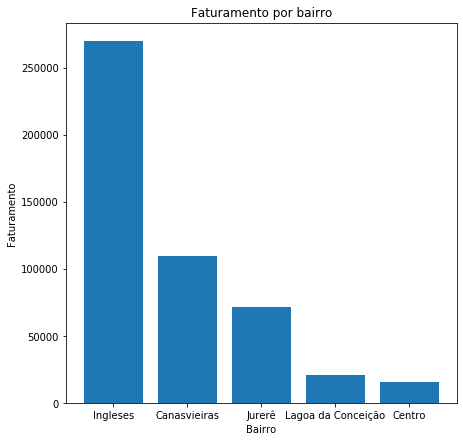

In [17]:
x = list(range(len(faturamento_por_bairro)))
plt.figure(figsize=(7,7))
plt.title("Faturamento por bairro")
plt.xlabel("Bairro")
plt.ylabel("Faturamento")
plt.xticks(x, list(faturamento_por_bairro_sorted.keys()))
plt.bar(x, list(faturamento_por_bairro_sorted.values()))
plt.show()

Outro valor interessante ser calculado é o faturamento por listing para normalizar o valor obtido para cada bairro

Jurerê 192
Ingleses 157
Canasvieiras 129
Lagoa da Conceição 96
Centro 81


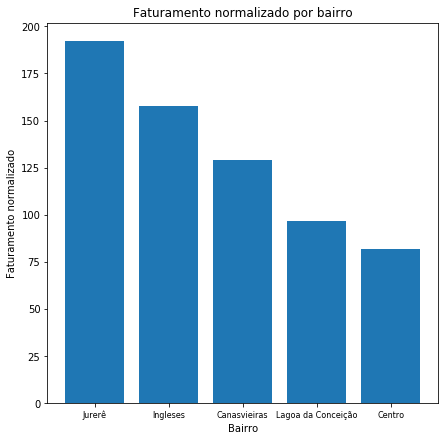

In [18]:
# Normalizando os faturamentos de cada bairro por listing
faturamento_por_bairro_normalizado = {}

for bairro in bairros_nome:
        faturamento_por_bairro_normalizado[bairro] = faturamento_por_bairro_sorted[
           bairro]/np.sum(np.logical_and(data_details["suburb"] == bairro, data_details["Faturamento"].notnull()))

        
# Ordenando o dicionario
faturamento_por_bairro_normalizado = dict(sorted(faturamento_por_bairro_normalizado.items(), key=lambda item: item[1], reverse=True))

for key in faturamento_por_bairro_normalizado:
    print(key, int(faturamento_por_bairro_normalizado[key]))
        
x = list(range(len(faturamento_por_bairro)))
plt.figure(figsize=(7,7))
plt.title("Faturamento normalizado por bairro")
plt.xlabel("Bairro")
plt.ylabel("Faturamento normalizado")
plt.tick_params(axis='x', which='major', labelsize=8)
plt.xticks(x, list(faturamento_por_bairro_normalizado.keys()))
plt.bar(x, list(faturamento_por_bairro_normalizado.values()))
plt.show()

O faturamento por listing modifica completamente a ordem, esse resultado pode mudar as decisões estratégicas.

# 3 Tarefa

Como o dataframe foi otimizado na segunda tarefa a terceira é obtida diretamente da chamada de correlação do Pandas.

Primeiramente a correlação pode ser calculada com valores numéricos então realizamos uma substituição. Como estamos interessados na relação entre o nome do bairro e o faturamento substituímos os bairros com maior faturamento pelos maiores valores.

Aqui precisamos fazer certas operações de limpeza nos dados, removendo a coluna "Unamed: 0". Precisamos lidar os dados perdidos (NaN no pandas dataframe) já que a função de correlação do Pandas desconsidera automaticamente seus valores quando calcula a correlação e a sua ausência pode ter impacto no faturamento em alguns casos.

Removemos o ad_name pois não será utilizado no cálculo da correlação.

In [19]:
# Criamos uma nova copia do dataset isso é feito pois a tabela é pequena e facilita um pouco a execução no Jupyter
data_correlation = data_details.copy()

# Aqui removemos as colunas não utilizadas para correlação
# O try except esta aqui para não termos problemas reutilização do codigo
data_details_features = []
for feature in data_details:
    data_details_features.append(feature)

try:
    index_unnamed = data_details_features.index("Unnamed: 0")
    data_details_features.pop(index_unnamed)
    data_correlation.drop(data_correlation.columns[index_unnamed], axis=1, inplace=True)
except KeyError:
    pass
except ValueError:
    pass

try:
    index_ad_name = data_details_features.index("ad_name")
    data_details_features.pop(index_ad_name)
    data_correlation.drop(data_correlation.columns[index_ad_name], axis=1, inplace=True)
except KeyError:
    pass
except ValueError:
    pass

# Trocamos para valores numericos para o calculo da correlação
dicionario_processamento_bairros_para_numero = {}
for i,bairro in enumerate(reversed(list(faturamento_por_bairro_normalizado.keys()))):
    dicionario_processamento_bairros_para_numero[bairro] = i   
    
dicionario_processamento_superhost_para_numero = {False:0, True:1}
try:
    data_correlation["is_superhost"].replace(dicionario_processamento_superhost_para_numero, inplace=True)
    data_correlation["suburb"].replace(dicionario_processamento_bairros_para_numero, inplace=True)
except TypeError:
    pass

Aqui finalmente lidamos com os valores NaN na tabela de reviews, uma das práticas mais simples é substituir os valores desconhecidos pela média para tentar "neutralizar" seu impacto. Contudo, nesse caso seria interessante identificar o motivo por que estão faltando já que tem um impacto muito grande no cálculo da correlação por reviews.

In [20]:
data_correlation["star_rating"] = data_correlation["star_rating"].fillna(data_correlation["star_rating"].mean())

A cada operação de mudança é importante visualizar o dataframe

In [21]:
data_correlation.head()

,airbnb_listing_id,suburb,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,Faturamento
0,31389869,4,2.0,2.0,5.000000,0,15.0,142.222222
1,40010667,2,1.0,1.0,4.832296,0,0.0,56.842105
2,38905997,3,1.0,1.0,4.500000,1,13.0,87.804348
3,22343656,3,2.0,1.0,5.000000,1,28.0,NaN
4,18328184,2,2.0,1.0,5.000000,1,35.0,115.992366


In [22]:
correlation = data_correlation.corr(method='pearson', min_periods=1)
print(correlation)

                     airbnb_listing_id    suburb  number_of_bedrooms  \
airbnb_listing_id             1.000000 -0.013092           -0.051791   
suburb                       -0.013092  1.000000            0.126091   
number_of_bedrooms           -0.051791  0.126091            1.000000   
number_of_bathrooms          -0.047441  0.165308            0.745900   
star_rating                  -0.009658  0.030206           -0.009718   
is_superhost                 -0.082513 -0.013656           -0.102447   
number_of_reviews            -0.347276 -0.044607           -0.097374   
Faturamento                  -0.000042  0.218078            0.292396   

                     number_of_bathrooms  star_rating  is_superhost  \
airbnb_listing_id              -0.047441    -0.009658     -0.082513   
suburb                          0.165308     0.030206     -0.013656   
number_of_bedrooms              0.745900    -0.009718     -0.102447   
number_of_bathrooms             1.000000     0.004192     -0.095708

Agora extraímos a parte da correlação com o fraturamento

In [23]:
faturamento_corelaçao = correlation["Faturamento"][:-1]

Finalmente os valores de correlação normalizados e o bar graph

airbnb_listing_id     -0.000042
suburb                 0.218078
number_of_bedrooms     0.292396
number_of_bathrooms    0.272471
star_rating            0.025349
is_superhost          -0.047013
number_of_reviews     -0.035029
Name: Faturamento, dtype: float64


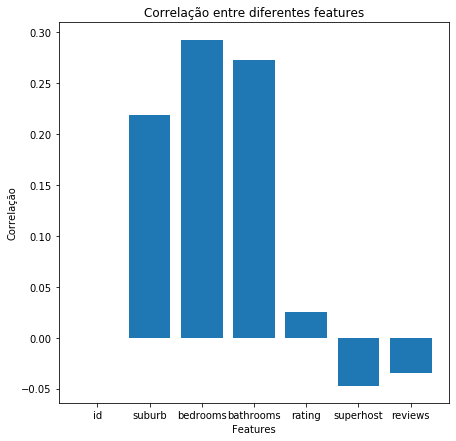

In [24]:
print(faturamento_corelaçao)

for i,feature in enumerate(data_correlation):
    data_details_features[i] = feature.split("_")[-1]    

x = list(range(len(faturamento_corelaçao)))
plt.figure(figsize=(7,7))
plt.title("Correlação entre diferentes features")
plt.xlabel("Features")
plt.ylabel("Correlação")
plt.xticks(x, list(data_details_features))
plt.tick_params(axis='x', which='major', labelsize=10)
plt.bar(x, list(faturamento_corelaçao))
plt.show()

Aqui a correlação com o número de estrelas ("rating") obtida foi muito baixa. Por isso é necessário estudar um pouco os dados e tentar entender o motivo disso. 

Isso pode ser primeiramente devido ao fato que esse é o atributo que mais falta nos dados, assim é interessante estudar o motivo dessa falta de dados e entender se o resultado não esperado é resultado de um viés da coleção dos dados. Se os dados vieram de uma chamada de API deve se ler a documentação dela.

Vamos primeiro verificar se existe casos em que a faturamento e não existe um rating.

In [25]:
np.sum( np.logical_and(data_details["star_rating"].notnull(),data_details["Faturamento"].isnull()) )

654

E interessante remover esses valores para conferir se altera o valor da correlação

In [26]:
data_details[np.logical_and(
    data_details["star_rating"].notnull(),data_details["Faturamento"].notnull())][["star_rating","Faturamento"]].corr(method='pearson', min_periods=1)

,star_rating,Faturamento
star_rating,1.000000,0.037649
Faturamento,0.037649,1.000000


Isso aumenta um pouco o valor da correlação mas ainda não é um valor alto o suficiente para ser considerado como relevante

# 4 Tarefa

Aqui vamos analisar a antecedência média das reservas.

O modulo datetime é excelente para fazer isso, pois permite a subtração direta entre datas. Ele ainda permite o cálculo do dia da semana com o fornecimento da data, ou seja, ideal para analisar as frequências de ocupação.

Nessa tarefa temos um problema relativo à maneira que os dados de ocupação estão organizados. Aqui temos o faturamento por dia de ocupação e temos uma linha para cada dia que o imóvel foi ocupado. Para calcular o tempo médio de antecedência da reserva não podemos considerar todas essas entradas, apenas a primeira entrada do dia de ocupação.

In [27]:
# Infelizmente nesse momento é necessario fazer um loop por todos os dados restantes no dataset
# Definimos uma variavel listing para lidar com a repetição de alugueis
# Começamos definindo as variaveis necessarias para o calculo da media
# E depois o dicionario para a construção do histograma referente as ocupações por dia da semana
previous_listing = 0
previous_booking = 0
total_days_distance = 0
days_counter = 0
frequencia_dia_ocupacao = {"Segunda": 0, "Terça": 0, "Quarta": 0, "Quinta":0, "Sexta":0, "Sabado":0, "Domingo":0}
frequencia_dia_reservacao = {"Segunda": 0, "Terça": 0, "Quarta": 0, "Quinta":0, "Sexta":0, "Sabado":0, "Domingo":0}
hash_weekday_nome = {0: "Segunda", 1:"Terça", 2:"Quarta", 3:"Quinta", 4:"Sexta", 5:"Sabado", 6:"Domingo"}

for listing,booking,date in zip(data_price["airbnb_listing_id"],data_price["booked_on"], data_price["date"]):
    
    # Essa parte do codigo se refere a distância dos dias da reserva a data de ocupação
    # Primeiramente processamos as datas da coluna e transformamos no objeto datetime
    booking = booking.split(" ")[0].split("-")
    booking = datetime.datetime(int(booking[0]), int(booking[1]), int(booking[2]))
    date = date.split("-")
    date = datetime.datetime(int(date[0]), int(date[1]), int(date[2]))
    
    # Os dias de ocupação não se repetem então podemos tratalos em todos os casos
    # Obter o dia de ocupaca e adicionar ao dicionario de contagem
    weekday = hash_weekday_nome[date.weekday()]
    frequencia_dia_ocupacao[weekday] = frequencia_dia_ocupacao[weekday] + 1
    
    if listing != previous_listing or booking != previous_booking: 
        # Aqui tratamos com a repetição de alugueis
        previous_listing = listing
        previous_booking = booking
    
        # Distância entre os dias e adicionar ao dicinario de contagem
        days = (date - booking).days
        total_days_distance = total_days_distance + days
        days_counter = days_counter + 1

        # Obter o dia da reservacao e adicionar ao dicionario de contagem
        weekday = hash_weekday_nome[booking.weekday()]
        frequencia_dia_reservacao[weekday] = frequencia_dia_reservacao[weekday] + 1
    
    

Agora temos a visualização final dos dados

In [28]:
print("Media das datas das reservações antecipadas: " + str(int(total_days_distance/days_counter)))

Media das datas das reservações antecipadas: 20


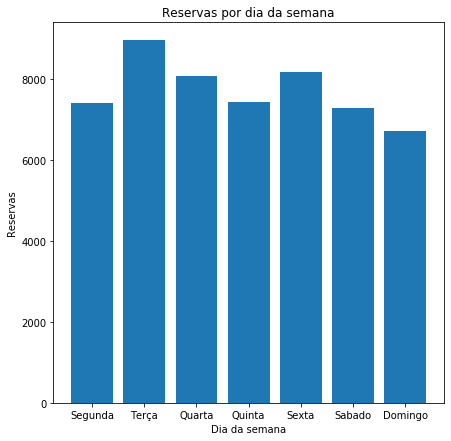

In [29]:
x = list(range(7))
plt.figure(figsize=(7,7))
plt.title("Reservas por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Reservas")
plt.xticks(x, list(frequencia_dia_reservacao.keys()))
plt.bar(x, list(frequencia_dia_reservacao.values()))
plt.show()

Nesse último histograma podemos perceber que as datas de ocupação são relativamente uniformes, mas a data que os clientes mais usam para fazer a reservação é a sexta e a terça.

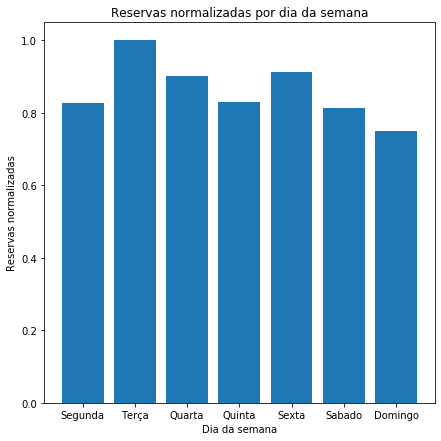

In [30]:
x = list(range(7))
plt.figure(figsize=(7,7))
plt.title("Reservas normalizadas por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Reservas normalizadas")
plt.xticks(x, list(frequencia_dia_reservacao.keys()))
plt.bar(x, [i/max(frequencia_dia_reservacao.values()) for i in frequencia_dia_reservacao.values()])
plt.show()

O gráfico normalizado não é muito diferente do absoluto, as conclusões permanecem iguais.

Uma última análise para os dias de ocupação. Repetindo os mesmos procedimentos de visualização:

Segunda 19777
Terça 19630
Quarta 18398
Quinta 18678
Sexta 20950
Sabado 22340
Domingo 20735


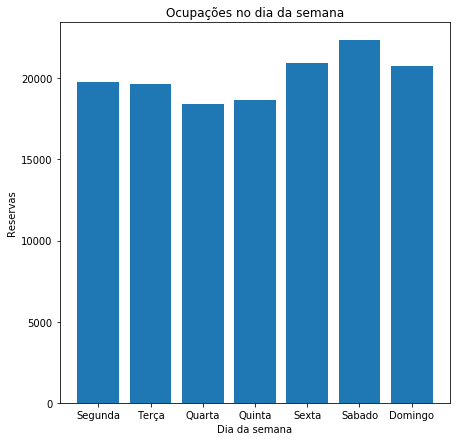

In [31]:
for day in frequencia_dia_ocupacao:
    print(day, frequencia_dia_ocupacao[day])

x = list(range(7))
plt.figure(figsize=(7,7))
plt.title("Ocupações no dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Reservas")
plt.xticks(x, list(frequencia_dia_ocupacao.keys()))
plt.bar(x, list(frequencia_dia_ocupacao.values()))
plt.show()

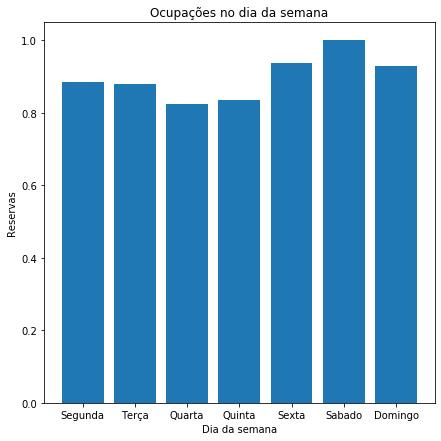

In [32]:
x = list(range(7))
plt.figure(figsize=(7,7))
plt.title("Ocupações no dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Reservas")
plt.xticks(x, list(frequencia_dia_ocupacao.keys()))
plt.bar(x, [i/max(frequencia_dia_ocupacao.values()) for i in frequencia_dia_ocupacao.values()])
plt.show()

Percebemos que os dias de ocupação são mais uniformes, sem muita preferência. Contudo, o sábado e domingo são vencedores por uma pequena margem.